In [24]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from statsmodels.robust.scale import huber
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import re
plt.style.use('seaborn')
%matplotlib inline

pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 0)



df_indicadores = pd.read_parquet(f'../data/processed/df_indicadores.parquet')

df_final_pob = pd.read_parquet('../data/processed/df_final_pob.parquet')


In [25]:
pd.set_option('display.max_rows', 0)

df_final_pob



,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,Abastecimiento de agua potable,"Abastos, mercados, lonjas",Acceso a los núcleos de población,Actividades funerarias,Alcantarillado,Alumbrado público,Biblioteca pública,Cementerio,Comercio ambulante,Conservación y rehabilitación de la edificación,"Conservación, mantenimiento y vigilancia de los edificios destinados a educación",Cooperar con las Administraciones educativas en la obtención de solares,Equipamientos culturales,Evacuación y tratamiento de aguas residuales,Ferias,Información y promoción de la actividad turística de interés y ámbito local,Infraestructura viaria y otros equipamientos de titularidad de la entidad local,Instalaciones de ocupación del tiempo libre,Instalaciones deportivas,Instalaciones deportivas de uso público,Limpieza viaria,Medio ambiente urbano,Medio ambiente urbano: Gestión de los residuos sólidos urbanos,Medio ambiente urbano: Parques y jardines públicos,Necesidad social y atención inmediata a personas en riesgo de exclusión social,Parque público,Participar en la vigilancia del cumplimiento de la escolaridad obligatoria,Pavimentación de las vías públicas,Policía local,Prevención y extinción de incendios,Promoción de la cultura,Promoción de la participación de los ciudadanos en las T.I.C.,Promoción del deporte,Promoción y gestión de la vivienda de protección pública,Protección civil,...,PC_Alumbrado público,PC_Biblioteca pública,PC_Cementerio,PC_Comercio ambulante,PC_Conservación y rehabilitación de la edificación,"PC_Conservación, mantenimiento y vigilancia de los edificios destinados a educación",PC_Cooperar con las Administraciones educativas en la obtención de solares,PC_Equipamientos culturales,PC_Evacuación y tratamiento de aguas residuales,PC_Ferias,PC_Información y promoción de la actividad turística de interés y ámbito local,PC_Infraestructura viaria y otros equipamientos de titularidad de la entidad local,PC_Instalaciones de ocupación del tiempo libre,PC_Instalaciones deportivas,PC_Instalaciones deportivas de uso público,PC_Limpieza viaria,PC_Medio ambiente urbano,PC_Medio ambiente urbano: Gestión de los residuos sólidos urbanos,PC_Medio ambiente urbano: Parques y jardines públicos,PC_Necesidad social y atención inmediata a personas en riesgo de exclusión social,PC_Parque público,PC_Participar en la vigilancia del cumplimiento de la escolaridad obligatoria,PC_Pavimentación de las vías públicas,PC_Policía local,PC_Prevención y extinción de incendios,PC_Promoción de la cultura,PC_Promoción de la participación de los ciudadanos en las T.I.C.,PC_Promoción del deporte,PC_Promoción y gestión de la vivienda de protección pública,PC_Protección civil,"PC_Protección contra contaminación acústica, lumínica y atmosférica",PC_Protección de la salubridad pública,PC_Protección y gestión del Patrimonio histórico,PC_Recogida de residuos,PC_Transporte colectivo urbano de viajeros,PC_Tratamiento de residuos,"PC_Tráfico, estacionamiento de vehículos y movilidad","PC_Urbanismo: planeamiento, gestión, ejecución y disciplina urbanística",PC_TOTAL,cohorte_pob
0,Andalucía,Almería,Ayuntamiento,Abla,01-04-001-AA-000,282928.39,0.00,16467.50,4615.09,98943.76,179881.08,8877.06,23513.28,18018.62,6210.62,59795.42,0.00,1085.90,80972.55,146163.96,0.00,35439.53,6249.48,23581.92,29393.67,57423.21,5818.66,6078.05,15279.77,20755.44,26665.37,197.52,28064.65,13979.51,0.0,15306.22,6325.31,23014.77,6498.97,0.00,...,145.652696,7.187903,19.039093,14.589976,5.028842,48.417344,0.000000,0.879271,65.564818,118.351385,0.000000,28.695976,5.060308,19.094672,23.800543,46.496526,4.711466,4.921498,12.372283,16.806024,21.591393,0.159935,22.724413,11.319441,0.0,12.393700,5.121709,18.635441,5.262324,0.00000,0.000000,4.189951,1.342227,0.000000,0.0,0.000000,3.449522,1.842899,1020.982721,1000-2000
1,Andalucía,Almería,Ayuntamiento,Abrucena,01-04-002-AA-000,77227.64,850.00,6269.10,500.00,14927.60,55508.73,4133.21,8178.12,4276.06,0.00,18257.51,0.00,0.00,15814.41,0.00,0.00,9

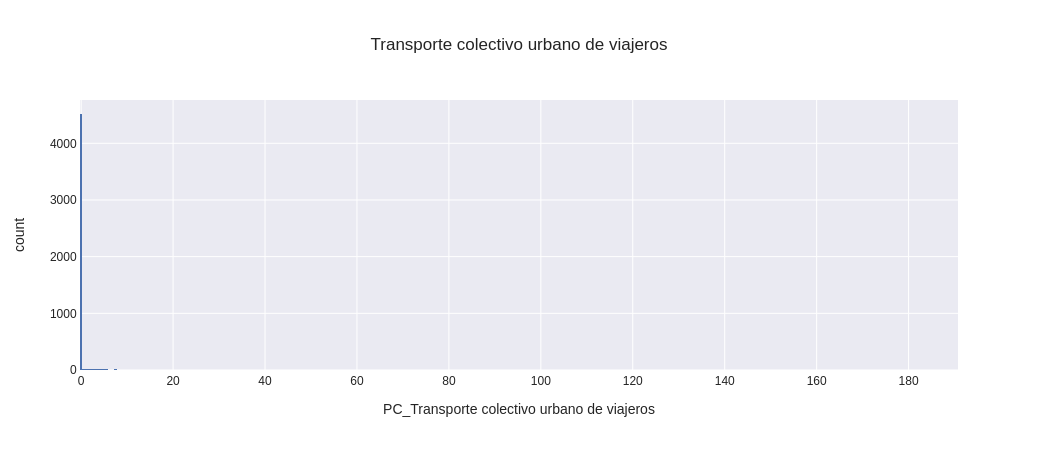

In [26]:
OB=df_final_pob.columns[44]

fig=px.histogram(df_final_pob, x=f'PC_{OB}',nbins=400,template='seaborn',title=f'{OB}',barmode='group')
fig.show()

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 0)



yea=df_final_pob[['CCAA', 'Provincia','Nombre Ente Principal','Código Ente Principal','Población 2018',
              'TOTAL', 'PC_TOTAL',OB,f'PC_{OB}']].sort_values(by=f'PC_{OB}', ascending=False).head(10).T
yea

,1147,4991,4457,664,1112,5134,271,1283,3782,1415
CCAA,Aragón,Comunitat Valenciana,Comunidad de Madrid,Andalucía,Aragón,Comunitat Valenciana,Andalucía,Canarias,Cataluña,Cantabria
Provincia,Zaragoza,Valencia / València,Madrid,Sevilla,Zaragoza,Valencia / València,Granada,"Palmas, Las",Tarragona,Cantabria
Nombre Ente Principal,Zaragoza,Cortes de Pallás,Madrid,Sevilla,Terrer,València,Granada,Palmas de Gran Canaria (Las),Tarragona,Santander
Código Ente Principal,02-50-297-AA-000,17-46-099-AA-000,12-28-079-AA-000,01-41-091-AA-000,02-50-253-AA-000,17-46-250-AA-000,01-18-087-AA-000,05-35-016-AA-000,09-43-148-AA-000,06-39-075-AA-000
Población 2018,666880,818,3.22333e+06,688711,485,791413,232208,378517,132299,172044
TOTAL,5.75617e+08,2.2989e+06,3.60662e+09,6.85009e+08,151877,6.62979e+08,2.69356e+08,4.04752e+08,1.58743e+08,1.40906e+08
PC_TOTAL,863.149,2810.39,1118.91,994.624,313.149,837.716,1159.98,1069.31,1199.88,819.01
Transporte colectivo urbano de viajeros,1.27051e+08,149311,5.53701e+08,1.13318e+08,71849.6,1.12117e+08,3.24197e+07,4.81071e+07,1.5552e+07,1.98047e+07
PC_Transporte colectivo urbano de viajeros,190.516,182.532,171.779,164.536,148.144,141.667,139.615,127.094,117.552,115.114


In [28]:


# pd.set_option('display.max_columns', None)

# df_final_pob.loc[(df_final_pob['Población 2018']>11000)&(df_final_pob['Población 2018']<11200)]

In [29]:
df_indicadores.loc[(df_indicadores['Código Ente Principal']==yea.iloc[3,0])&(df_indicadores['Descripción']==OB)]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades
24931,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Transporte colectivo urbano de viajeros,Nº total de kms de calzada de la red en trayec...,330.0
24932,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Transporte colectivo urbano de viajeros,Nº total de viajeros al año,91522671.0
24933,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Transporte colectivo urbano de viajeros,Nº total de autobuses,339.0
24974,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Transporte colectivo urbano de viajeros,Nº total de kms de calzada de la red en trayec...,0.0
24975,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Transporte colectivo urbano de viajeros,Nº total de viajeros al año,0.0
24976,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Transporte colectivo urbano de viajeros,Nº total de autobuses,0.0
25017,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Transporte colectivo urbano de viajeros,Nº total de kms de calzada de la red en trayec...,0.0
25018,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Transporte colectivo urbano de viajeros,Nº total de viajeros al año,0.0
25019,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Transporte colectivo urbano de viajeros,Nº total de autobuses,0.0
25060,Zaragoza,02-50-297-AA-000,Ayuntamiento,Zaragoza,Transporte colectivo urbano de viajeros,Nº total de kms de calzada de la red en trayec...,0.0


# MELT

In [30]:
pd.set_option('display.max_rows', 0)
vars_melt=df_final_pob.columns[0:5].to_list()+df_final_pob.columns[95:96].to_list()


df_final_pob_melt=pd.melt(df_final_pob, id_vars=vars_melt,value_vars=df_final_pob.columns[5:48],
        var_name='Descripción',value_name='coste_efectivo')


df_final_pob_melt.to_parquet('../data/processed/df_final_pob_melt.parquet')

print(df_final_pob_melt['coste_efectivo'].sum())

df_final_pob_melt



28641291941.31


,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo
0,Andalucía,Almería,Ayuntamiento,Abla,01-04-001-AA-000,1000-2000,Abastecimiento de agua potable,282928.39
1,Andalucía,Almería,Ayuntamiento,Abrucena,01-04-002-AA-000,1000-2000,Abastecimiento de agua potable,77227.64
2,Andalucía,Almería,Ayuntamiento,Adra,01-04-003-AA-000,20000-50000,Abastecimiento de agua potable,1255574.16
3,Andalucía,Almería,Ayuntamiento,Albánchez,01-04-004-AA-000,0-1000,Abastecimiento de agua potable,60828.11
4,Andalucía,Almería,Ayuntamiento,Alboloduy,01-04-005-AA-000,0-1000,Abastecimiento de agua potable,157266.48
5,Andalucía,Almería,Ayuntamiento,Albox,01-04-006-AA-000,10000-20000,Abastecimiento de agua potable,0.00
6,Andalucía,Almería,Ayuntamiento,Alcolea,01-04-007-AA-000,0-1000,Abastecimiento de agua potable,61945.05
7,Andalucía,Almería,Ayuntamiento,Alcóntar,01-04-008-AA-000,0-1000,Abastecimiento de agua potable,50007.27
8,Andalucía,Almería,Ayuntamiento,Alcudia de Monteagud,01-04-009-AA-000,0-1000,Abastecimiento de agua potable,36579.39
...,...,...,...,...,...,...,...,...


In [31]:
2793076.4291718914

2793076.4291718914

In [32]:
pd.set_option('display.max_rows', 0)
vars_melt=df_final_pob.columns[0:5].to_list()+df_final_pob.columns[95:96].to_list()


df_final_pob_melt_PC=pd.melt(df_final_pob, id_vars=vars_melt,value_vars=df_final_pob.columns[51:94].to_list(),
        var_name='Descripción',value_name='coste_efectivo_PC')


df_final_pob_melt_PC.to_parquet('../data/processed/df_final_pob_melt_PC.parquet')

print(df_final_pob_melt_PC['coste_efectivo_PC'].sum())

df_final_pob_melt_PC

2793076.4291718914


,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo_PC
0,Andalucía,Almería,Ayuntamiento,Abla,01-04-001-AA-000,1000-2000,PC_Abastecimiento de agua potable,229.091814
1,Andalucía,Almería,Ayuntamiento,Abrucena,01-04-002-AA-000,1000-2000,PC_Abastecimiento de agua potable,67.154470
2,Andalucía,Almería,Ayuntamiento,Adra,01-04-003-AA-000,20000-50000,PC_Abastecimiento de agua potable,50.507831
3,Andalucía,Almería,Ayuntamiento,Albánchez,01-04-004-AA-000,0-1000,PC_Abastecimiento de agua potable,80.781023
4,Andalucía,Almería,Ayuntamiento,Alboloduy,01-04-005-AA-000,0-1000,PC_Abastecimiento de agua potable,253.247150
5,Andalucía,Almería,Ayuntamiento,Albox,01-04-006-AA-000,10000-20000,PC_Abastecimiento de agua potable,0.000000
6,Andalucía,Almería,Ayuntamiento,Alcolea,01-04-007-AA-000,0-1000,PC_Abastecimiento de agua potable,76.099570
7,Andalucía,Almería,Ayuntamiento,Alcóntar,01-04-008-AA-000,0-1000,PC_Abastecimiento de agua potable,94.710739
8,Andalucía,Almería,Ayuntamiento,Alcudia de Monteagud,01-04-009-AA-000,0-1000,PC_Abastecimiento de agua potable,270.958444
...,...,...,...,...,...,...,...,...


In [33]:
columns_total=df_final_pob.columns[5:48].to_list()

print(len(columns_total))

columns_pc=df_final_pob.columns[51:94].to_list()
print(len(columns_pc))

43
43


In [34]:
    
    
cohorte='0-1000'
partida_de_coste_types='Abastecimiento domiciliario de agua potable'
    
lista=[]
for x in columns_total:
    y= df_final_pob_melt.loc[(df_final_pob_melt['cohorte_pob'] == cohorte) & (df_final_pob_melt['Descripción'] == x),'coste_efectivo'].sum()/df_final_pob.loc[df_final_pob['cohorte_pob'] == cohorte , 'Población 2018'].sum()
    lista.append(round(y,2))


lista

[70.03,
 0.68,
 17.63,
 3.81,
 11.76,
 64.99,
 4.41,
 7.84,
 0.25,
 6.37,
 17.41,
 1.28,
 7.25,
 6.5,
 2.96,
 5.96,
 35.23,
 6.82,
 11.72,
 25.25,
 26.28,
 1.68,
 1.42,
 7.01,
 42.82,
 13.41,
 0.21,
 55.87,
 3.63,
 1.13,
 23.59,
 2.59,
 6.0,
 0.45,
 0.64,
 0.85,
 1.26,
 1.7,
 19.17,
 0.47,
 2.42,
 0.37,
 18.22]

In [35]:
partida_de_coste_types='PC_Abastecimiento domiciliario de agua potable'


lista2=[]
for x in columns_pc:
    y=np.median(df_final_pob_melt_PC.loc[(df_final_pob_melt_PC['cohorte_pob'] == cohorte) & (df_final_pob_melt_PC['Descripción'] == x) & (df_final_pob_melt_PC['coste_efectivo_PC']>0), 'coste_efectivo_PC'])
    lista2.append(round(y,2)) 
    
lista2



[62.28,
 3.98,
 6.48,
 1.01,
 7.82,
 59.33,
 9.51,
 3.83,
 2.18,
 25.76,
 19.85,
 8.04,
 11.02,
 4.35,
 20.18,
 17.98,
 47.96,
 12.5,
 21.14,
 25.54,
 18.69,
 8.31,
 14.63,
 13.24,
 38.71,
 13.22,
 4.66,
 28.01,
 36.6,
 3.92,
 33.67,
 20.03,
 11.63,
 5.42,
 5.52,
 6.89,
 4.89,
 7.53,
 43.46,
 14.24,
 15.68,
 3.56,
 24.35]

In [36]:
df_final_pob_melt_PC.loc[(df_final_pob_melt['Nombre Ente Principal']=='Lugo')]

,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo_PC
3995,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Abastecimiento de agua potable,33.524107
8864,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,"PC_Abastos, mercados, lonjas",1.498495
13733,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Acceso a los núcleos de población,0.000000
18602,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Actividades funerarias,3.349011
23471,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Alcantarillado,29.978559
28340,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Alumbrado público,37.020919
33209,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Biblioteca pública,2.623337
38078,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Cementerio,3.348384
42947,Galicia,Lugo,Ayuntamiento,Lugo,11-27-028-AA-000,50000-100000,PC_Comercio ambulante,0.000000
...,...,...,...,...,...,...,...,...


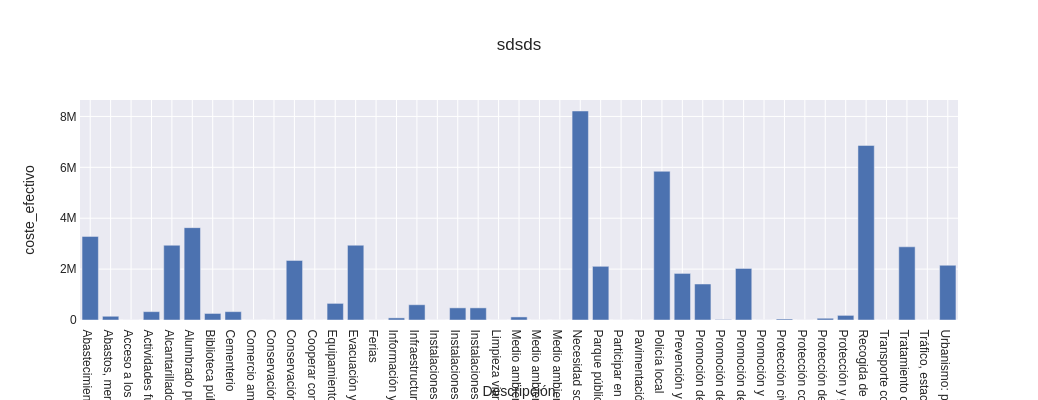

In [37]:
graph=df_final_pob_melt.loc[(df_final_pob_melt['Nombre Ente Principal']=='Lugo')]


fig=px.bar(graph,x='Descripción', y='coste_efectivo',template='seaborn',title='sdsds',barmode='stack', orientation='v')
fig.update_layout(height=400, width=1200)
fig.show()

/home/carpiero/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



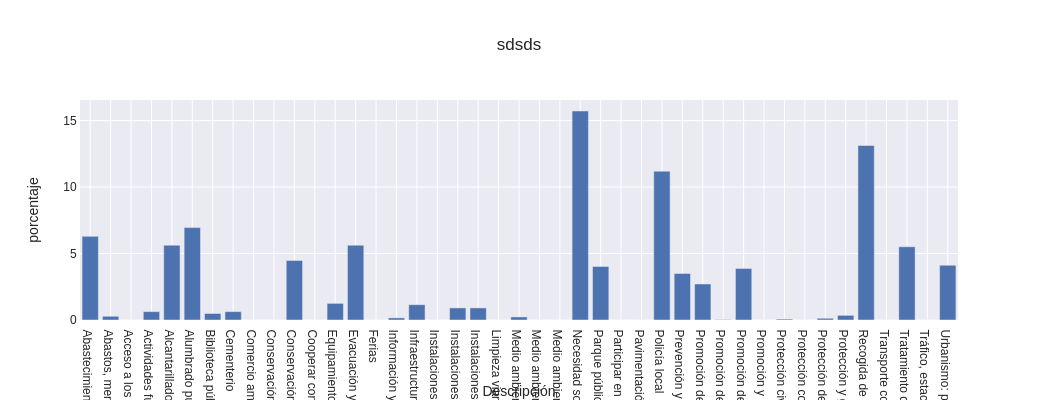

In [38]:
def porcentaje(df):
    df['porcentaje']=df.apply(lambda new: round(new['coste_efectivo']/df['coste_efectivo'].sum()*100,2), axis=1)
    return df

graph_porc=porcentaje(graph)


fig=px.bar(graph_porc,x='Descripción', y='porcentaje',template='seaborn',title='sdsds',barmode='stack', orientation='v')
fig.update_layout(height=400, width=1200)
fig.show()

In [39]:
df_indicadores.loc[(df_indicadores['Nombre Ente Principal']=='Lugo')&(df_indicadores['Descripción']=='Policía local')]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades
5472,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº efectivos asignados al servicio,117.0
5473,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº vehículos adscritos al servicio,25.0
5514,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº efectivos asignados al servicio,0.0
5515,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº vehículos adscritos al servicio,0.0


# MEAN

In [40]:
df_final_pob.describe().T

,count,mean,std,min,25%,50%,75%,max
Abastecimiento de agua potable,4869.0,354777.251010,2.108914e+06,0.0,1263.460000,17924.200000,87548.220000,5.213138e+07
"Abastos, mercados, lonjas",4869.0,33926.290115,6.364999e+05,0.0,0.000000,0.000000,0.000000,2.990401e+07
Acceso a los núcleos de población,4869.0,37771.049793,2.062460e+05,0.0,0.000000,1.000000,8794.100000,7.428429e+06
Actividades funerarias,4869.0,26235.939191,4.698905e+05,0.0,0.000000,1.000000,1603.330000,2.909213e+07
Alcantarillado,4869.0,101223.892672,7.949925e+05,0.0,0.000000,1641.240000,14000.000000,2.987615e+07
Alumbrado público,4869.0,236204.862035,1.547620e+06,0.0,11813.620000,38702.770000,139051.480000,8.605973e+07
Biblioteca pública,4869.0,62466.948636,4.687014e+05,0.0,0.000000,0.000000,24137.470000,2.736592e+07
Cementerio,4869.0,37982.991489,4.188734e+05,0.0,0.010000,1201.350000,10323.040000,1.840672e+07
Comercio ambulante,4869.0,2916.237149,3.412904e+04,0.0,0.000000,0.000000,0.000000,1.721658e+06
...,...,...,...,...,...,...,...,...


In [41]:
columns_total=df_final_pob.columns[5:48].to_list()+df_final_pob.columns[50:51].to_list()

print(len(columns_total))

columns_pc=df_final_pob.columns[51:94].to_list()
print(len(columns_pc))
columns_pc

44
43


['PC_Abastecimiento de agua potable',
 'PC_Abastos, mercados, lonjas ',
 'PC_Acceso a los núcleos de población',
 'PC_Actividades funerarias',
 'PC_Alcantarillado',
 'PC_Alumbrado público',
 'PC_Biblioteca pública',
 'PC_Cementerio',
 'PC_Comercio ambulante',
 'PC_Conservación y rehabilitación de la edificación',
 'PC_Conservación, mantenimiento y vigilancia de los edificios destinados a educación',
 'PC_Cooperar con las Administraciones educativas en la obtención de solares',
 'PC_Equipamientos culturales',
 'PC_Evacuación y tratamiento de aguas residuales',
 'PC_Ferias ',
 'PC_Información y promoción de la actividad turística de interés y ámbito local',
 'PC_Infraestructura viaria y otros equipamientos de titularidad de la entidad local',
 'PC_Instalaciones de ocupación del tiempo libre',
 'PC_Instalaciones deportivas',
 'PC_Instalaciones deportivas de uso público',
 'PC_Limpieza viaria',
 'PC_Medio ambiente urbano',
 'PC_Medio ambiente urbano: Gestión de los residuos sólidos urbanos

In [42]:
rs = RobustScaler()
# X = pd.DataFrame(rs.fit_transform(X), columns= X.columns)
rs.fit(df_final_pob[columns_pc])

rs.center_


array([3.97074060e+01, 0.00000000e+00, 3.07692308e-03, 2.05338809e-03,
       3.07793123e+00, 4.23548893e+01, 0.00000000e+00, 1.83266936e+00,
       0.00000000e+00, 0.00000000e+00, 8.62068966e-01, 0.00000000e+00,
       0.00000000e+00, 3.22580645e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.13496933e+00,
       1.33668531e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.71146251e+00, 0.00000000e+00, 1.70345522e+01,
       0.00000000e+00, 0.00000000e+00, 6.45090361e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.53261795e+00])

In [43]:
df_final_pob.describe().T['mean'].to_list()

[354777.25101047446,
 33926.29011501335,
 37771.04979256521,
 26235.939190798934,
 101223.89267200656,
 236204.86203532552,
 62466.94863627029,
 37982.991489012114,
 2916.2371493119736,
 39623.87046621483,
 227931.67427397822,
 13763.580833846785,
 72247.9864243171,
 80167.32603409325,
 16651.106611213803,
 53235.42897104128,
 79574.81684534812,
 44695.855436434584,
 94308.8426370918,
 249114.1546149107,
 394984.0092483056,
 23407.371825836926,
 33301.493499691926,
 97041.9496878209,
 670175.2627808584,
 205142.67906346274,
 11425.990825631547,
 227932.20094886015,
 621589.239502978,
 117144.63383240912,
 183082.2330149928,
 31549.076705689058,
 121339.45160813308,
 49821.18379544054,
 29847.317406038204,
 12485.767286917231,
 44512.11248716369,
 19318.88000821524,
 344085.1915896488,
 316856.1992154447,
 102778.63538919696,
 133638.1079995892,
 226097.5637050729,
 8087.2483056069,
 5882376.656666666,
 66.4742401756412,
 0.8827538328700139,
 14.906496911589368,
 3.562335291032662,
 11.

In [44]:
df=df_final_pob_melt

well_statuses=['Aragón','Andalucía','La Rioja']
well_types=['Zaragoza','Córdoba']
municipio_types=['Torrellas','Palma del Río']
partida_de_coste_types=['Actividades funerarias','Biblioteca pública']

df[df["CCAA"].isin(well_statuses)
        & df['Provincia'].isin(well_types)
        & df['Nombre Ente Principal'].isin(municipio_types)
        & df['Descripción'].isin(partida_de_coste_types)]

,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo
14782,Andalucía,Córdoba,Ayuntamiento,Palma del Río,01-14-049-AA-000,20000-50000,Actividades funerarias,4507477.74
15693,Aragón,Zaragoza,Ayuntamiento,Torrellas,02-50-261-AA-000,0-1000,Actividades funerarias,122492.81
29389,Andalucía,Córdoba,Ayuntamiento,Palma del Río,01-14-049-AA-000,20000-50000,Biblioteca pública,113611.81
30300,Aragón,Zaragoza,Ayuntamiento,Torrellas,02-50-261-AA-000,0-1000,Biblioteca pública,0.00


In [45]:

dff=df[df["CCAA"].isin(well_statuses)
        & df['Provincia'].isin(well_types)
        & df['Nombre Ente Principal'].isin(municipio_types)
        & df['Descripción'].isin(partida_de_coste_types)]


dff["coste_efectivo"].values

array([4507477.74,  122492.81,  113611.81,       0.  ])

In [46]:
CCAA=sorted(df_final_pob['CCAA'].unique().to_list())
CCAA.insert(0, 'TODAS')


CCAA_dict = dict(zip(CCAA, CCAA))

CCAA_dict


{'TODAS': 'TODAS',
 'Andalucía': 'Andalucía',
 'Aragón': 'Aragón',
 'Canarias': 'Canarias',
 'Cantabria': 'Cantabria',
 'Castilla y León': 'Castilla y León',
 'Castilla-La Mancha': 'Castilla-La Mancha',
 'Cataluña': 'Cataluña',
 'Comunidad de Madrid': 'Comunidad de Madrid',
 'Comunitat Valenciana': 'Comunitat Valenciana',
 'Extremadura': 'Extremadura',
 'Galicia': 'Galicia',
 'Illes Balears': 'Illes Balears',
 'La Rioja': 'La Rioja',
 'Principado de Asturias': 'Principado de Asturias',
 'Región de Murcia': 'Región de Murcia'}

In [47]:
list(CCAA_dict.keys())[0]

'TODAS'

In [48]:
prov=sorted(df_final_pob['Provincia'].unique().to_list())
prov.insert(0, 'TODAS')
PROV = dict(zip(prov, prov))

CCAA_options = [ {"label": CCAA_dict[x], "value": x}for x in CCAA_dict]

PROV_type_options = [ {"label": PROV[x], "value":x}for x in PROV ]

In [49]:
pd.set_option('display.max_rows', 0)

CCAA_types = 'Cantabria'

if CCAA_types =='TODAS':
    value=list(PROV.keys())[0]
    options=PROV_type_options
else:
    
    prov_def=sorted(df_final_pob_melt.loc[df_final_pob_melt['CCAA']==CCAA_types,'Provincia'].unique().to_list())
    prov_def.insert(0, 'TODAS')
    PROV_def = dict(zip(prov_def, prov_def))
    PROV_def_type_options = [ {"label": PROV_def[x], "value":x}for x in PROV_def ]
    value=list(PROV_def.keys())[0]



PROV_def_type_options



[{'label': 'TODAS', 'value': 'TODAS'},
 {'label': 'Cantabria', 'value': 'Cantabria'}]

In [50]:
print(value)
options

TODAS


NameError: name 'options' is not defined

In [51]:
df_final_pob_melt.loc[(df_final_pob_melt['CCAA']=='Canarias') & (df_final_pob_melt['coste_efectivo']>100),'Descripción'].unique().shape

(43,)

In [52]:
df_final_pob_melt['coste_efectivo'].sum()

28641291941.31

In [53]:
df_final_pob['PC_TOTAL'].sum()

2793076.429171892

In [54]:
df_final_pob['Población 2018'].sum()

39376812.0

In [55]:
df_final_pob_melt['coste_efectivo'].sum()/df_final_pob['Población 2018'].sum()

727.3644179551661

In [56]:
df_final_pob.loc[df_final_pob['CCAA'] == CCAA_types,'Población 2018'].sum()

567465.0

In [57]:
Población_text='727 hab.'



pob=int(''.join(re.findall(r'\d' , Población_text)))

pob

727

In [58]:
municipio_types= 'Madrid'

juan=df_final_pob_melt.loc[df_final_pob_melt['Nombre Ente Principal'] == municipio_types , 'cohorte_pob'].unique().to_list()[0]

In [59]:
df_final_pob_melt.loc[df_final_pob_melt['cohorte_pob'] == juan ]

,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo
548,Andalucía,Málaga,Ayuntamiento,Málaga,01-29-067-AA-000,500000-5000000,Abastecimiento de agua potable,4.110684e+07
645,Andalucía,Sevilla,Ayuntamiento,Sevilla,01-41-091-AA-000,500000-5000000,Abastecimiento de agua potable,4.233650e+07
1115,Aragón,Zaragoza,Ayuntamiento,Zaragoza,02-50-297-AA-000,500000-5000000,Abastecimiento de agua potable,2.611428e+07
2825,Cataluña,Barcelona,Ayuntamiento,Barcelona,09-08-019-AA-000,500000-5000000,Abastecimiento de agua potable,7.893861e+06
4186,Comunidad de Madrid,Madrid,Ayuntamiento,Madrid,12-28-079-AA-000,500000-5000000,Abastecimiento de agua potable,2.941334e+07
4854,Comunitat Valenciana,Valencia / València,Ayuntamiento,València,17-46-250-AA-000,500000-5000000,Abastecimiento de agua potable,1.722048e+07
5417,Andalucía,Málaga,Ayuntamiento,Málaga,01-29-067-AA-000,500000-5000000,"Abastos, mercados, lonjas",1.523297e+06
5514,Andalucía,Sevilla,Ayuntamiento,Sevilla,01-41-091-AA-000,500000-5000000,"Abastos, mercados, lonjas",5.307434e+06
5984,Aragón,Zaragoza,Ayuntamiento,Zaragoza,02-50-297-AA-000,500000-5000000,"Abastos, mercados, lonjas",3.158866e+06
...,...,...,...,...,...,...,...,...


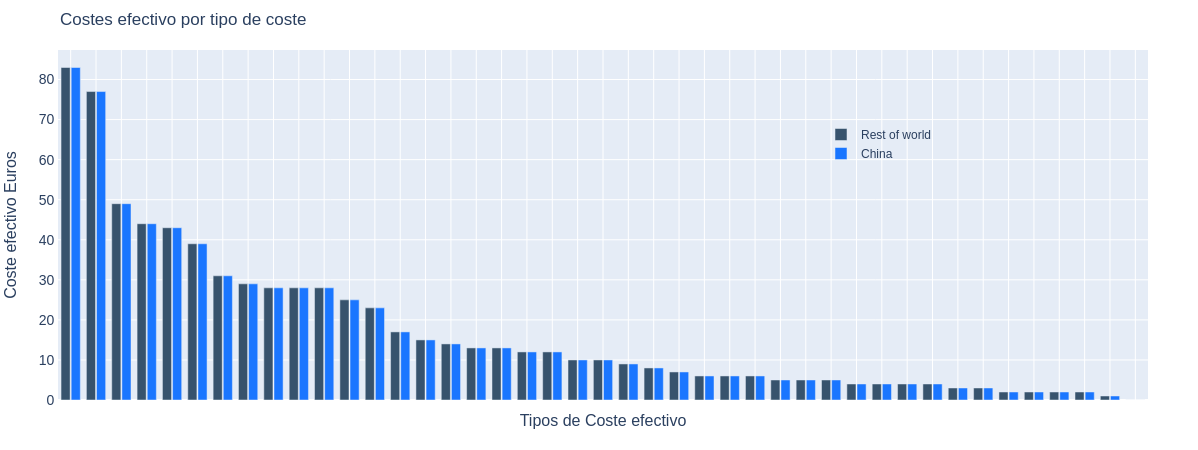

In [182]:
# graph = df_final_pob_melt.loc[(df_final_pob_melt['Nombre Ente Principal'] == municipio_types)]



df=df_final_pob_melt.pivot_table(index=['Descripción'],values=['coste_efectivo'],aggfunc=sum).sort_values(by='coste_efectivo',ascending=False).reset_index()
div=df_final_pob['Población 2018'].sum()
df['coste_efectivo_new']=df.apply(lambda new: round(new['coste_efectivo']/div,0), axis=1)

fig = go.Figure()
fig.add_trace(go.Bar(x=df['Descripción'] ,
                     y=df['coste_efectivo_new'] ,
                     name='Rest of world' ,
                     marker_color='rgb(55, 83, 109)'
                     ))
fig.add_trace(go.Bar(x=df['Descripción'] ,
                     y=df['coste_efectivo_new'],
                     name='China' ,
                     marker_color='rgb(26, 118, 255)'
                     ))



fig.update_layout(margin=dict(l=20,r=50,t=50,b=50),
title='Costes efectivo por tipo de coste' ,
xaxis_tickfont_size=12 ,
xaxis_tickangle=-45,
yaxis=dict(
    title='Coste efectivo Euros' ,
    titlefont_size=16 ,
    tickfont_size=14 ,
) ,
xaxis=dict(
    title='Tipos de Coste efectivo' ,
    titlefont_size=16 ,
    tickfont_size=14 ,showticklabels=False,
) ,                  

legend=dict(
    x=0.7 ,
    y=0.8 ,
    bgcolor='rgba(255, 255, 255, 0)' ,
    bordercolor='rgba(255, 255, 255, 0)'
) ,
barmode='group' ,
bargap=0.20 ,  # gap between bars of adjacent location coordinates.
bargroupgap=0.1  # gap between bars of the same location coordinate.
)


fig.show()

In [ ]:
df_final_pob_melt['Descripción']

In [187]:
PROV_types='Soria'

In [189]:
PROV_types='Soria'

df=df_final_pob_melt.pivot_table(index=['Provincia','Descripción'],values=['coste_efectivo'],aggfunc=sum).sort_values(by='coste_efectivo',ascending=False).reset_index()

div=df_final_pob.loc[df_final_pob['Provincia'] == PROV_types,'Población 2018'].sum()

df=df.loc[df['Provincia'] == PROV_types]
df['coste_efectivo_new']=df.apply(lambda new: new['coste_efectivo']/div, axis=1)






df

,Provincia,Descripción,coste_efectivo
0,Barcelona,Necesidad social y atención inmediata a person...,5.904030e+08
1,Madrid,Necesidad social y atención inmediata a person...,5.716942e+08
2,Madrid,Policía local,5.683260e+08
3,Madrid,Transporte colectivo urbano de viajeros,5.647959e+08
4,Barcelona,Policía local,4.717130e+08
5,Madrid,Limpieza viaria,3.768895e+08
6,Barcelona,Limpieza viaria,3.593108e+08
7,Madrid,Instalaciones deportivas de uso público,3.183499e+08
8,Madrid,Pavimentación de las vías públicas,2.921383e+08
...,...,...,...


In [188]:
df_final_pob.loc[df_final_pob['Provincia'] == PROV_types,'Población 2018'].sum()

68670.0

In [185]:
df_final_pob.loc[df_final_pob['CCAA'] == CCAA_types,'Población 2018'].sum()

567465.0

In [194]:
municipio_types='Abades'

In [196]:
cohorte = df_final_pob_melt.loc[df_final_pob_melt['Nombre Ente Principal'] == municipio_types , 'cohorte_pob'] \
            .unique().to_list()[0]

# value = np.median(df_final_pob_melt_PC.loc[(df_final_pob_melt_PC['cohorte_pob'] == cohorte) & \
#             (df_final_pob_melt_PC['Descripción'] == f'PC_{partida_de_coste_types}') & (
#                 df_final_pob_melt_PC['coste_efectivo_PC'] > 0) , 'coste_efectivo_PC'])
    
    

In [204]:
ho=df_final_pob_melt_PC.loc[ df_final_pob_melt_PC['coste_efectivo_PC'] > 0]


ho


,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo_PC
0,Andalucía,Almería,Ayuntamiento,Abla,01-04-001-AA-000,1000-2000,PC_Abastecimiento de agua potable,229.091814
1,Andalucía,Almería,Ayuntamiento,Abrucena,01-04-002-AA-000,1000-2000,PC_Abastecimiento de agua potable,67.154470
2,Andalucía,Almería,Ayuntamiento,Adra,01-04-003-AA-000,20000-50000,PC_Abastecimiento de agua potable,50.507831
3,Andalucía,Almería,Ayuntamiento,Albánchez,01-04-004-AA-000,0-1000,PC_Abastecimiento de agua potable,80.781023
4,Andalucía,Almería,Ayuntamiento,Alboloduy,01-04-005-AA-000,0-1000,PC_Abastecimiento de agua potable,253.247150
6,Andalucía,Almería,Ayuntamiento,Alcolea,01-04-007-AA-000,0-1000,PC_Abastecimiento de agua potable,76.099570
7,Andalucía,Almería,Ayuntamiento,Alcóntar,01-04-008-AA-000,0-1000,PC_Abastecimiento de agua potable,94.710739
8,Andalucía,Almería,Ayuntamiento,Alcudia de Monteagud,01-04-009-AA-000,0-1000,PC_Abastecimiento de agua potable,270.958444
9,Andalucía,Almería,Ayuntamiento,Alhabia,01-04-010-AA-000,0-1000,PC_Abastecimiento de agua potable,32.840818
...,...,...,...,...,...,...,...,...


In [206]:
ho.pivot_table(index=['cohorte_pob','Descripción'],values=['coste_efectivo_PC'],aggfunc=np.median).reset_index()

,cohorte_pob,Descripción,coste_efectivo_PC
0,0-1000,PC_Abastecimiento de agua potable,62.277097
1,0-1000,"PC_Abastos, mercados, lonjas",3.984898
2,0-1000,PC_Acceso a los núcleos de población,6.482000
3,0-1000,PC_Actividades funerarias,1.014874
4,0-1000,PC_Alcantarillado,7.823011
5,0-1000,PC_Alumbrado público,59.326083
6,0-1000,PC_Biblioteca pública,9.514083
7,0-1000,PC_Cementerio,3.833920
8,0-1000,PC_Comercio ambulante,2.177400
...,...,...,...
